In [33]:
#Import the libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [34]:
train_set = pd.read_csv('datasets/titanic/train.csv')
test_set = pd.read_csv('datasets/titanic/test.csv')

In [35]:
%matplotlib inline
import seaborn as sns
sns.set()

In [36]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


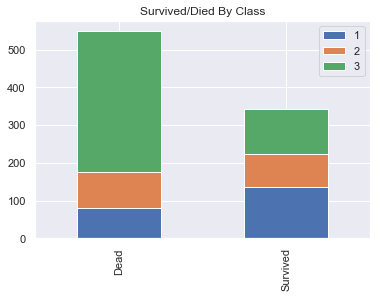

In [37]:
#Dead and survived by class
class_dead = train_set[train_set["Survived"]==0]["Pclass"].value_counts()
class_survived = train_set[train_set["Survived"]==1]["Pclass"].value_counts()
class_df = pd.DataFrame([class_dead, class_survived])
class_df.index = ["Dead", "Survived"]
class_df.plot(kind="bar", stacked=True, title="Survived/Died By Class")

In [38]:
class_df

,1,2,3
Dead,80,97,372
Survived,136,87,119


In [39]:
class_1_survived = class_df.iloc[1,0]/class_df.iloc[:,0].sum()*100
class_2_survived = class_df.iloc[1,1]/class_df.iloc[:,1].sum()*100
class_3_survived = class_df.iloc[1,2]/class_df.iloc[:,2].sum()*100
print("Percentage of Class 1 that survived:" ,round(class_1_survived),"%")
print("Percentage of Class 2 that survived:" ,round(class_2_survived), "%")
print("Percentage of Class 3 that survived:" ,round(class_3_survived), "%")

Percentage of Class 1 that survived: 63.0 %
Percentage of Class 2 that survived: 47.0 %
Percentage of Class 3 that survived: 24.0 %


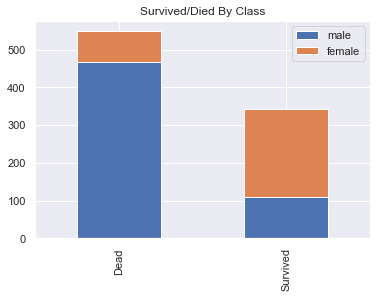

In [40]:
#Dead and survived by gender
sex_dead = train_set[train_set["Survived"]==0]["Sex"].value_counts()
sex_survived = train_set[train_set["Survived"]==1]["Sex"].value_counts()
sex_df = pd.DataFrame([sex_dead, sex_survived])
sex_df.index = ["Dead", "Survived"]
sex_df.plot(kind="bar", stacked=True, title="Survived/Died By Class")

In [41]:
sex_df

,male,female
Dead,468,81
Survived,109,233


In [42]:
men_survived = sex_df.iloc[1,0]/sex_df.iloc[:,0].sum()*100
women_survived = sex_df.iloc[1,1]/sex_df.iloc[:,1].sum()*100
print("Percentage of Men that survived:" ,round(men_survived),"%")
print("Percentage of Women 2 that survived:" ,round(women_survived), "%")

Percentage of Men that survived: 19.0 %
Percentage of Women 2 that survived: 74.0 %


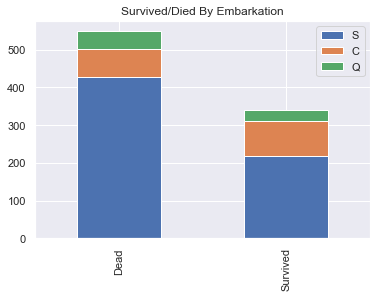

In [43]:
#Dead and Survived by embarkation port
port_dead = train_set[train_set["Survived"]==0]["Embarked"].value_counts()
port_survived = train_set[train_set["Survived"]==1]["Embarked"].value_counts()
port_df = pd.DataFrame([port_dead, port_survived])
port_df.index = ["Dead", "Survived"]
port_df.plot(kind="bar", stacked=True, title="Survived/Died By Embarkation")

In [44]:
port_df

,S,C,Q
Dead,427,75,47
Survived,217,93,30


In [45]:
S_survived = port_df.iloc[1,0]/port_df.iloc[:,0].sum()*100
C_survived = port_df.iloc[1,1]/port_df.iloc[:,1].sum()*100
Q_survived = port_df.iloc[1,2]/port_df.iloc[:,2].sum()*100
print("Percentage of S that survived:" ,round(S_survived),"%")
print("Percentage of C that survived:" ,round(C_survived), "%")
print("Percentage of Q that survived:" ,round(Q_survived), "%")

Percentage of S that survived: 34.0 %
Percentage of C that survived: 55.0 %
Percentage of Q that survived: 39.0 %


In [46]:
X = train_set.drop(['PassengerId','Cabin','Ticket','Fare', 'Parch', 'SibSp'], axis = 1)
y = X.Survived
X = X.drop(['Survived'], axis = 1)
X.head()

,Pclass,Name,Sex,Age,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,3,"Heikkinen, Miss. Laina",female,26.0,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,3,"Allen, Mr. William Henry",male,35.0,S


In [47]:
#Cleaning categorical data
#Encoding sex
from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()
X.Sex = l_encoder.fit_transform(X.Sex)

In [48]:
sum(X.Embarked.isnull())

2

In [49]:
#Encoding embarked
row_index = X.Embarked.isnull()
X.loc[row_index, "Embarked"] = "S"

Embarked  = pd.get_dummies(  X.Embarked , prefix='Embarked'  )
X = X.drop(['Embarked'], axis=1)
X= pd.concat([X, Embarked], axis=1)  
# One of the columns is not needed
X = X.drop(['Embarked_S'], axis=1)

X.head()

,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q
0,3,"Braund, Mr. Owen Harris",1,22.0,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,0
4,3,"Allen, Mr. William Henry",1,35.0,0,0


In [50]:
sum(X.Age.isnull())

177

In [51]:
#Changing name to title
got= train_set.Name.str.split(',').str[1]
X.iloc[:,1]=pd.DataFrame(got).Name.str.split('\s+').str[1]

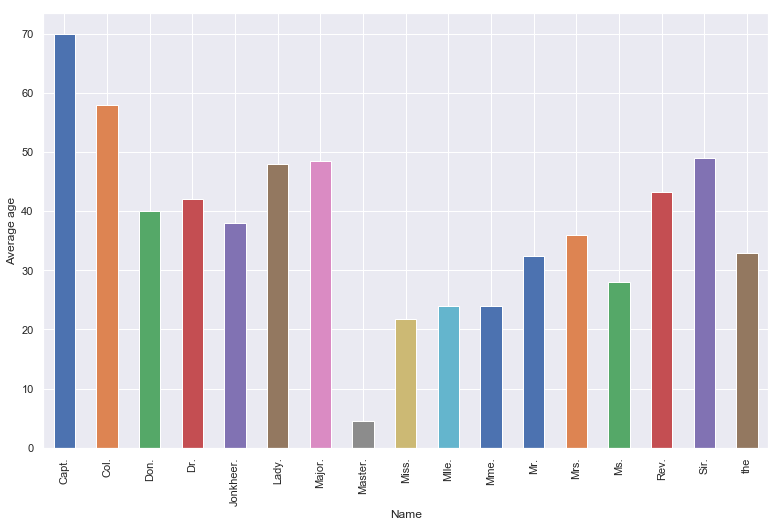

In [52]:
#List of different titles
ax = plt.subplot()
ax.set_ylabel('Average age')
X.groupby('Name').mean()['Age'].plot(kind='bar',figsize=(13,8), ax = ax)

In [53]:
#Average age by title
title_mean_age=[]
title_mean_age.append(list(set(X.Name)))  #set for unique values of the title, and transform into list
title_mean_age.append(X.groupby('Name').Age.mean())
title_mean_age

[['Don.',
  'the',
  'Sir.',
  'Miss.',
  'Mme.',
  'Ms.',
  'Major.',
  'Mr.',
  'Lady.',
  'Col.',
  'Master.',
  'Mrs.',
  'Mlle.',
  'Dr.',
  'Rev.',
  'Capt.',
  'Jonkheer.'],
 Name
 Capt.        70.000000
 Col.         58.000000
 Don.         40.000000
 Dr.          42.000000
 Jonkheer.    38.000000
 Lady.        48.000000
 Major.       48.500000
 Master.       4.574167
 Miss.        21.773973
 Mlle.        24.000000
 Mme.         24.000000
 Mr.          32.368090
 Mrs.         35.898148
 Ms.          28.000000
 Rev.         43.166667
 Sir.         49.000000
 the          33.000000
 Name: Age, dtype: float64]

In [54]:
#Fill the missing age
n_traning= train_set.shape[0]   #number of rows
n_titles= len(title_mean_age[1])
for i in range(0, n_traning):
    if np.isnan(X.Age[i])==True:
        for j in range(0, n_titles):
            if X.Name[i] == title_mean_age[0][j]:
                X.Age[i] = title_mean_age[1][j]
X=X.drop(['Name'], axis=1)
X

,Pclass,Sex,Age,Embarked_C,Embarked_Q
0,3,1,22.000000,0,0
1,1,0,38.000000,1,0
2,3,0,26.000000,0,0
3,1,0,35.000000,0,0
4,3,1,35.000000,0,0
5,3,1,4.574167,0,1
6,1,1,54.000000,0,0
7,3,1,2.000000,0,0
8,3,0,27.000000,0,0
9,2,0,14.000000,1,0


In [55]:
#Make age categorical
for i in range(0, n_traning):
    if X.Age[i] > 18:
        X.Age[i]= 0
    else:
        X.Age[i]= 1

X.head()

,Pclass,Sex,Age,Embarked_C,Embarked_Q
0,3,1,0.0,0,0
1,1,0,0.0,1,0
2,3,0,0.0,0,0
3,1,0,0.0,0,0
4,3,1,0.0,0,0


In [56]:
#Testing different models

In [57]:
########################Logistic Regression#######################
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Logistic Regression:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")

Logistic Regression:
 Accuracy: 0.7788956985586198 +/- 0.02301002038118436 



In [58]:
######################## KNN #######################
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("K-NN:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")

K-NN:
 Accuracy: 0.7968615934627171 +/- 0.030251909517970528 



In [59]:
######################## SVM #######################
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("SVM:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")

SVM:
 Accuracy: 0.7866981613891726 +/- 0.028360961436535385 



In [60]:
######################## Naive Bayes #######################
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Naive Bayes:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")

Naive Bayes:
 Accuracy: 0.7700070934059698 +/- 0.01971680800274141 



In [61]:
######################## Random Forest #######################
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Random Forest:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std())

Random Forest:
 Accuracy: 0.8103447395301326 +/- 0.030148160857141507
